<a href="https://colab.research.google.com/github/Haikoo96/aiffel_quest2RE/blob/main/DL_lms/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 케라스에서 필요한 모듈 불러오
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import callbacks

In [ ]:
# 검증 데이터 만들기
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print(len(x_val))
print(len(y_val))

404
102
122
122


In [ ]:
# 학습데이터 테스트데이터 standardization

# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean_trn = train_data.mean(axis=0)
train_data = train_data - mean_trn

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std_trn = train_data.std(axis=0)
train_data = train_data/std_trn

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean_tst = test_data.mean(axis=0)
std_tst = train_data.std(axis=0)
test_data = test_data - mean_tst
test_data = test_data/std_tst

In [ ]:
# 모델 구성 및 컴파
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, kernel_regularizer='l1', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, kernel_regularizer='l1', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

model.save('boston_housing_model.h1')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_21 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_22 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_23 (Ba  (None, 16)               

In [ ]:
# 체크포인트와 early stopping 추
check_point_cb = callbacks.ModelCheckpoint('boston_housing_model.h1',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
9/9 [==============================] - 4s 237ms/step - loss: 591.2701 - mae: 22.5684 - val_loss: 993.0038 - val_mae: 30.0778
Epoch 2/20
9/9 [==============================] - 2s 209ms/step - loss: 578.7979 - mae: 22.2875 - val_loss: 824.7947 - val_mae: 27.1341
Epoch 3/20
9/9 [==============================] - 3s 312ms/step - loss: 565.2076 - mae: 21.9824 - val_loss: 759.5784 - val_mae: 25.8700
Epoch 4/20
9/9 [==============================] - 2s 284ms/step - loss: 553.4993 - mae: 21.6877 - val_loss: 725.3330 - val_mae: 25.1867
Epoch 5/20
9/9 [==============================] - 2s 206ms/step - loss: 541.3947 - mae: 21.4145 - val_loss: 692.8727 - val_mae: 24.5518
Epoch 6/20
9/9 [==============================] - 2s 207ms/step - loss: 532.6574 - mae: 21.1924 - val_loss: 666.6860 - val_mae: 24.0109
Epoch 7/20
9/9 [==============================] - 2s 207ms/step - loss: 521.6355 - mae: 20.9525 - val_loss: 647.6580 - val_mae: 23.6058
Epoch 8/20
9/9 [==============================] 

<ipython-input-35-50f5a22de8e9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


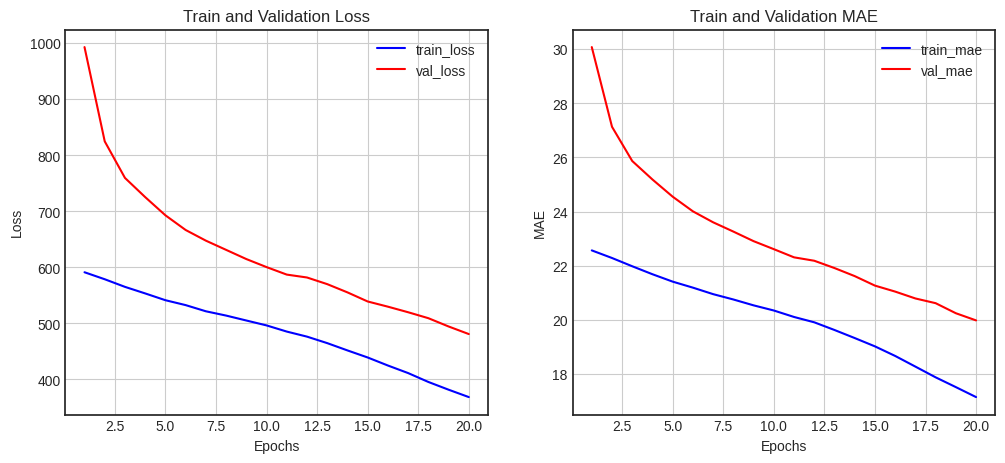

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 476.5729 - mae: 19.5027


[476.5729064941406, 19.502674102783203]